# Annotating workflows

Annotating workflows with pyiron as example. Note that `pyiron_atomistics` needs to be installed for this notebook.

In [1]:
%config IPCompleter.evaluation='unsafe'

In [2]:
from pyiron_atomistics import Project
from atomrdf import KnowledgeGraph, System, Workflow
import numpy as np

/home/menon/miniconda3/envs/workflow-rdf-v0.2/lib/python3.11/site-packages/numpy/core/getlimits.py:542: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)
2024-04-16 18:35:17,228 - pyiron_log - WARNING - pyiron found a 'templates' folder in the /home/menon/pyiron/resources resource directory. These are no longer supported in pyiron_base >=0.7.0. They are replaced by Project.create_job_class() and Project.wrap_python_function().


In [3]:
pr = Project('wf9')

In [4]:
kg = KnowledgeGraph(store=pr)

In [5]:
wf = Workflow(kg, environment='pyiron')

In [6]:
structure = pr.create.structure.annotated_structure.bulk('Cu', cubic=True)

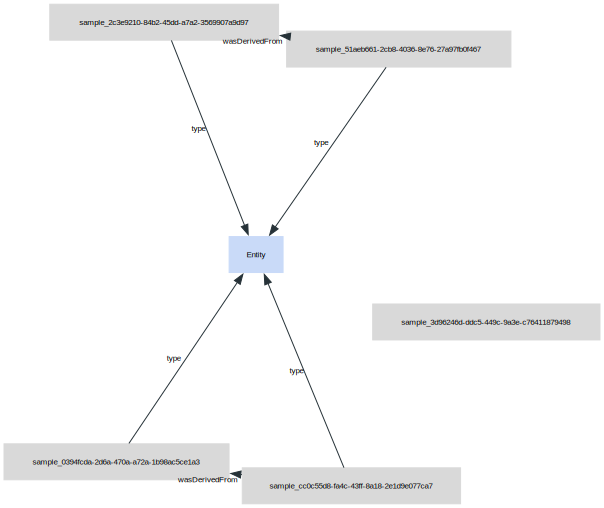

In [7]:
kg.visualise(workflow_view=True)

In [8]:
job = pr.create.job.Lammps('j1', delete_existing_job=True, delete_aborted_job=True)

In [9]:
job.structure = structure

In [10]:
job.potential = '2001--Mishin-Y--Cu-1--LAMMPS--ipr1'

In [11]:
job.calc_md(pressure=0, temperature=500)

In [12]:
job.run()

The job j1 was saved and received the ID: 8173


In [13]:
wf.to_graph(job)

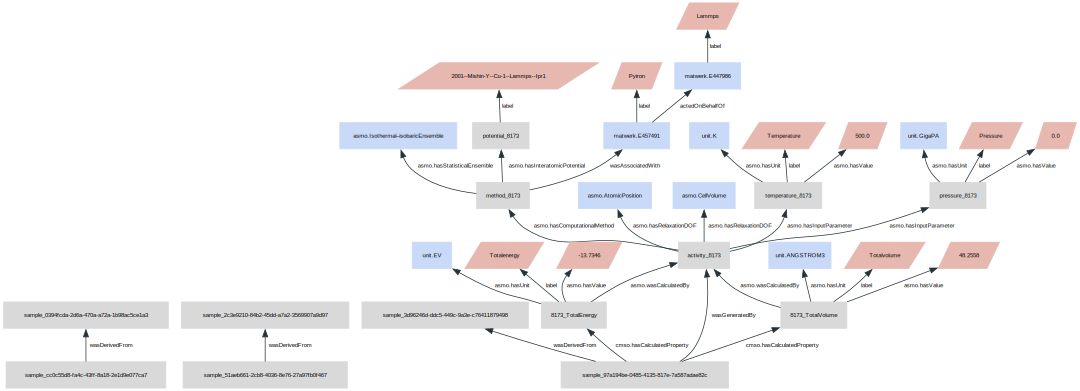

In [14]:
kg.visualise(workflow_view=True, hide_types=True, size=(15,15), layout='dot')